# Loan to Income Ratio by Default Probability Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "../Data/lti_default_rate.csv"
df = pd.read_csv(filename)

In [3]:
df

,lti_bin,number_of_loans,default_rate
0,70% >\t,9,0.778
1,50% - 70%,316,0.763
2,30% - 50%\t,3831,0.665
3,10% - 30%\t,18948,0.170
4,< 10%,9475,0.115


C:\Users\PC\AppData\Local\Temp\ipykernel_38200\1275159881.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lti_bin', y='default_rate', data=df, palette='viridis', ax=ax)


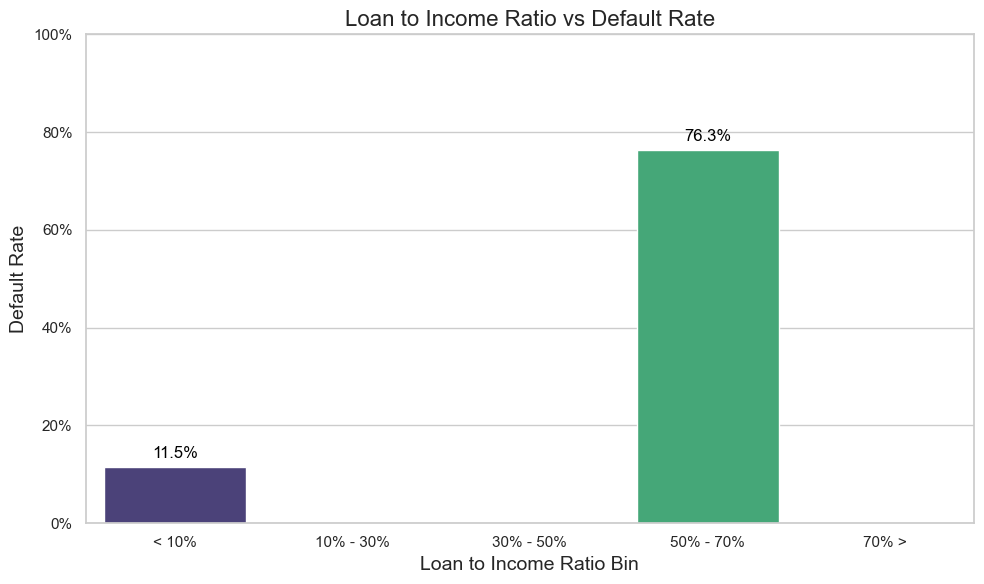

In [5]:
from matplotlib.ticker import FuncFormatter

## stacked bar chart in seaboarn with data labels
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Sort the DataFrame by 'lti_bin' for better visualization
lti_order = ['< 10%', '10% - 30%', '30% - 50%', '50% - 70%', '70% >']
df['lti_bin'] = pd.Categorical(df['lti_bin'], categories=lti_order, ordered=True)
df = df.sort_values('lti_bin')

# Create bar plot
sns.barplot(x='lti_bin', y='default_rate', data=df, palette='viridis', ax=ax)
ax.set_title('Loan to Income Ratio vs Default Rate', fontsize=16)
ax.set_xlabel('Loan to Income Ratio Bin', fontsize=14)
ax.set_ylabel('Default Rate', fontsize=14)
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')
plt.tight_layout()


